In [355]:
import pandas as pd
import re
import csv
import json
from time import sleep
from bs4 import BeautifulSoup
import requests
from datetime import datetime

In [356]:
# Get the current date and time
now = datetime.now()

# Extract just the date
today = now.date()

In [357]:
print(today)

2022-12-29


In [343]:
#Refresh DF
df = pd.DataFrame()

In [358]:
def get_base(title, location):
    
    #Clean parameters
    title = title.lower().replace(' ','-')
    location = location.lower().replace(' ', '-')
    
    #Assign initial template
    template = 'https://www.salary.com/research/salary/listing/{}-salary/{}'
    url = template.format(title, location)
    response = requests.get(url)
    
    if response.status_code != 200:
        template = 'https://www.salary.com/research/salary/alternate/{}-salary/{}'
        url = template.format(title, location)
        response = requests.get(url)

    if response.status_code != 200:
        template = 'https://www.salary.com/research/salary/benchmark/{}-salary/{}'
        url = template.format(title, location)
        response = requests.get(url)
        
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #Determine which text block you want to scrape
    pattern = re.compile(r'Occupation')
    script = soup.find('script', {'type':'application/ld+json'}, text=pattern)
    
    #Turn text data into dictionary
    json_raw = script.contents[0]
    json_data = json.loads(json_raw)
    
    business_title = json_data['name']
    median = int(json_data['estimatedSalary'][0]['median'])
    
    print(f"The median base salary for a {business_title} in {city} is ${median:,.0f}")
    
    #Save results to dictionary
    res = {'Query Date':today, 'Business Title':business_title, 'City':city, 'Median':median}
    
    #Append results to DataFrame
    global df
    df = df.append(res, ignore_index=True)
    
    df = df[['Query Date', 'Business Title', 'City','Median']]
    
    return df

In [359]:
get_base('data scientist IV','san francisco CA')

The median base salary for a Data Scientist IV in San Francisco Ca is $172,696


,Query Date,Business Title,City,Median
0,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
1,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
2,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0
3,2022-12-29,Senior Compensation Analyst,San Francisco Ca,120490.0
4,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0


In [360]:
get_base('associate data scientist', 'san francisco ca')

The median base salary for a Associate Data Scientist in San Francisco Ca is $113,819


,Query Date,Business Title,City,Median
0,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
1,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
2,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0
3,2022-12-29,Senior Compensation Analyst,San Francisco Ca,120490.0
4,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
5,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0


In [361]:
get_base('Director Global Compensation', 'san francisco ca')

The median base salary for a Director Global Compensation in San Francisco Ca is $244,300


,Query Date,Business Title,City,Median
0,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
1,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
2,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0
3,2022-12-29,Senior Compensation Analyst,San Francisco Ca,120490.0
4,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
5,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
6,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0


In [363]:
get_base('Senior compensation analyst', 'san francisco ca')

The median base salary for a Senior Compensation Analyst in San Francisco Ca is $120,490


,Query Date,Business Title,City,Median
0,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
1,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
2,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0
3,2022-12-29,Senior Compensation Analyst,San Francisco Ca,120490.0
4,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
5,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
6,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0
7,2022-12-29,Senior Compensation Analyst,San Francisco Ca,120490.0


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Query Date      7 non-null      object 
 1   Business Title  7 non-null      object 
 2   City            7 non-null      object 
 3   Median          7 non-null      float64
dtypes: float64(1), object(3)
memory usage: 352.0+ bytes


In [352]:
df = df.drop_duplicates(keep='first')

In [353]:
df

,Query Date,Business Title,City,Median
0,2022-12-29,Data Scientist IV,San Francisco Ca,172696.0
1,2022-12-29,Associate Data Scientist,San Francisco Ca,113819.0
2,2022-12-29,Director Global Compensation,San Francisco Ca,244300.0
3,2022-12-29,Senior Compensation Analyst,San Francisco Ca,120490.0


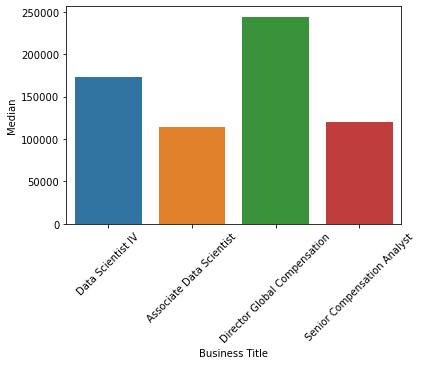

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df, x = 'Business Title', y='Median')
plt.xticks(rotation=45);